In [102]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


#Chicago Bulls: Rishabh Mondal, Smit Mehta, Abhinab Mondal, Shrijan Sahu





from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)





#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Question1
            

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_waveform(X: pd.DataFrame, y: pd.Series, num_rows: int = 3, num_cols: int = 2) -> None:
    """
    Plots the waveform for each activity class
    :param X: The input features extracted from MakeDataset.py
    :param y: The labels for the input features extracted from MakeDataset.py
    :param num_rows: Number of rows in the plot
    :param num_cols: Number of columns in the plot
    """
    columns = [f'axis_{axis}_{i}' for axis in ['x', 'y', 'z'] for i in range(500)]
    df = pd.DataFrame(X.reshape((X.shape[0], -1)), columns=columns)
    df['activity_class'] = y
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = np.ravel(axes)
    activity_classes = df['activity_class'].unique()
    activity_classes.sort()
    
    activity = {1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}
    
    for i, activity_class in enumerate(activity_classes):
        activity_df = df[df['activity_class'] == activity_class].drop('activity_class', axis=1)
        activity_mean = activity_df.mean()
        axes[i].plot(activity_mean)
        axes[i].set_xticks([])
        axes[i].set_title(f'{activity[activity_class]}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Acceleration')
    
    plt.tight_layout()
    plt.show()
   

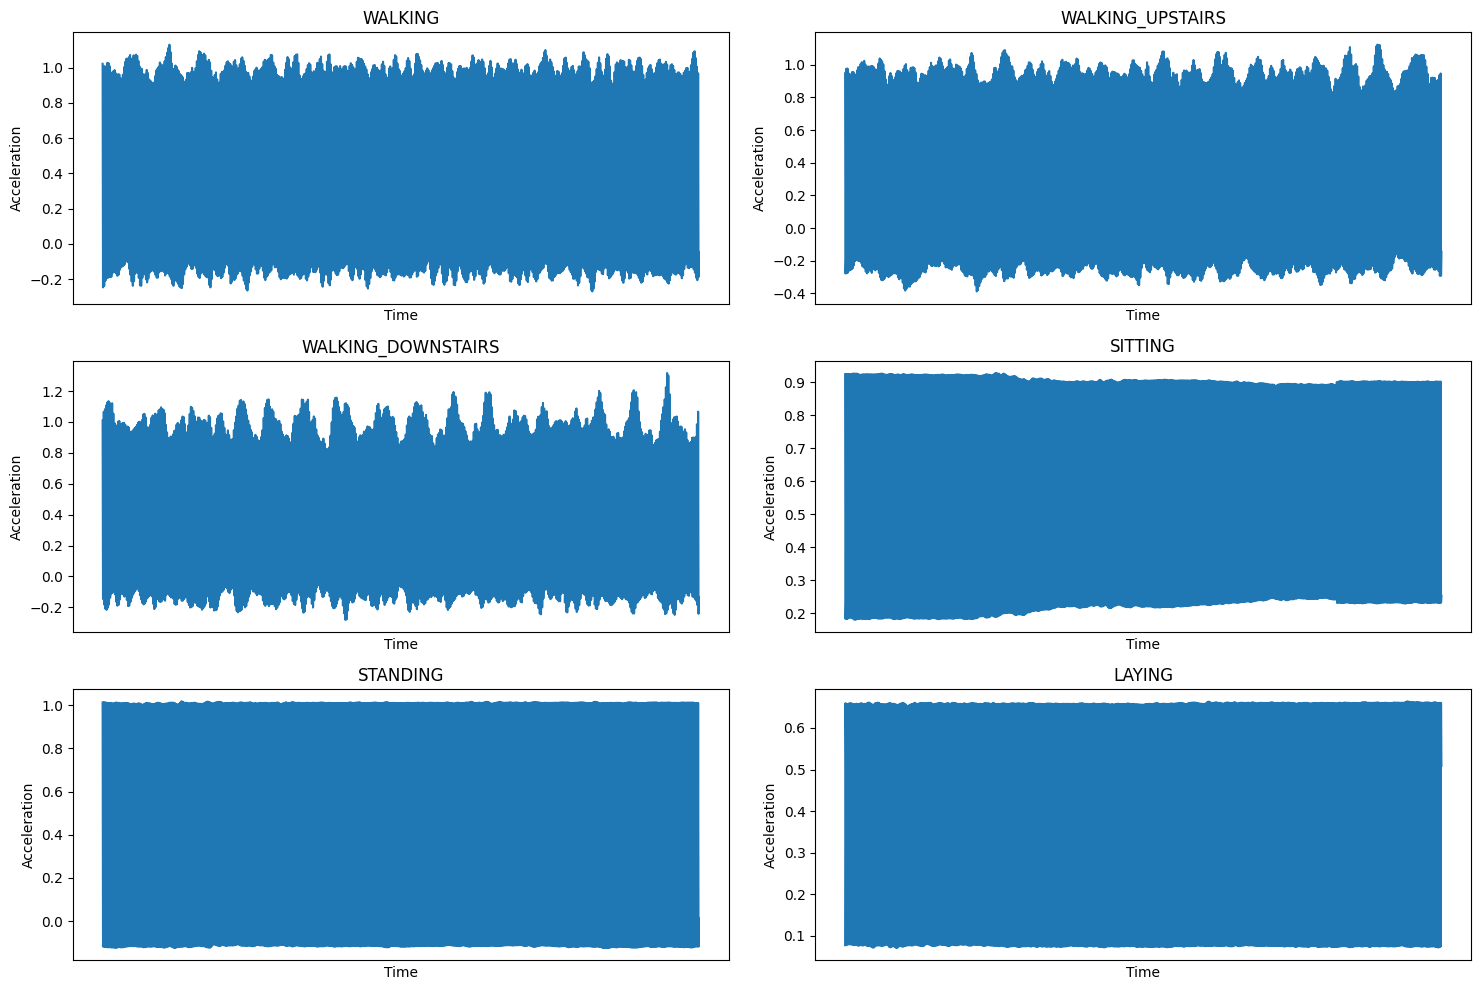

In [15]:
plot_waveform(X_train, y_train)

Based on the above plots, it is clear that for dynamic activities, the wavefrom have variations while for static activites the waveform is constant.

Question 2 : 

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_activity_acceleration(X: np.ndarray, y: np.ndarray, rows: int = 3, cols: int = 2) -> None:
  
    # Compute the magnitude of linear acceleration
    acceleration_magnitude = np.sqrt(np.sum(np.square(X), axis=2))
    
    # Create a DataFrame for easier plotting
    acceleration_df = pd.DataFrame(acceleration_magnitude, columns=[f"accel_{i}" for i in range(acceleration_magnitude.shape[1])])
    acceleration_df['activity'] = y
    
    # Create subplots for each activity
    fig, subplot_axes = plt.subplots(rows, cols, figsize=(20, 15))
    subplot_axes = subplot_axes.flatten()
    
    # Define activity labels
    activity_labels = {
        1: "WALKING",
        2: "WALKING_UPSTAIRS",
        3: "WALKING_DOWNSTAIRS",
        4: "SITTING",
        5: "STANDING",
        6: "LAYING"
    }
    
    # Plot the average linear acceleration for each activity class
    for index, activity_class in enumerate(sorted(acceleration_df['activity'].unique())):
        class_df = acceleration_df[acceleration_df['activity'] == activity_class].drop(columns='activity')
        avg_acceleration = class_df.mean()
        
        subplot_axes[index].plot(avg_acceleration)
        subplot_axes[index].set_title(f'{activity_labels[activity_class]}')
        subplot_axes[index].set_xlabel('Time')
        subplot_axes[index].set_ylabel('Acceleration')
        subplot_axes[index].set_xticks([])
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


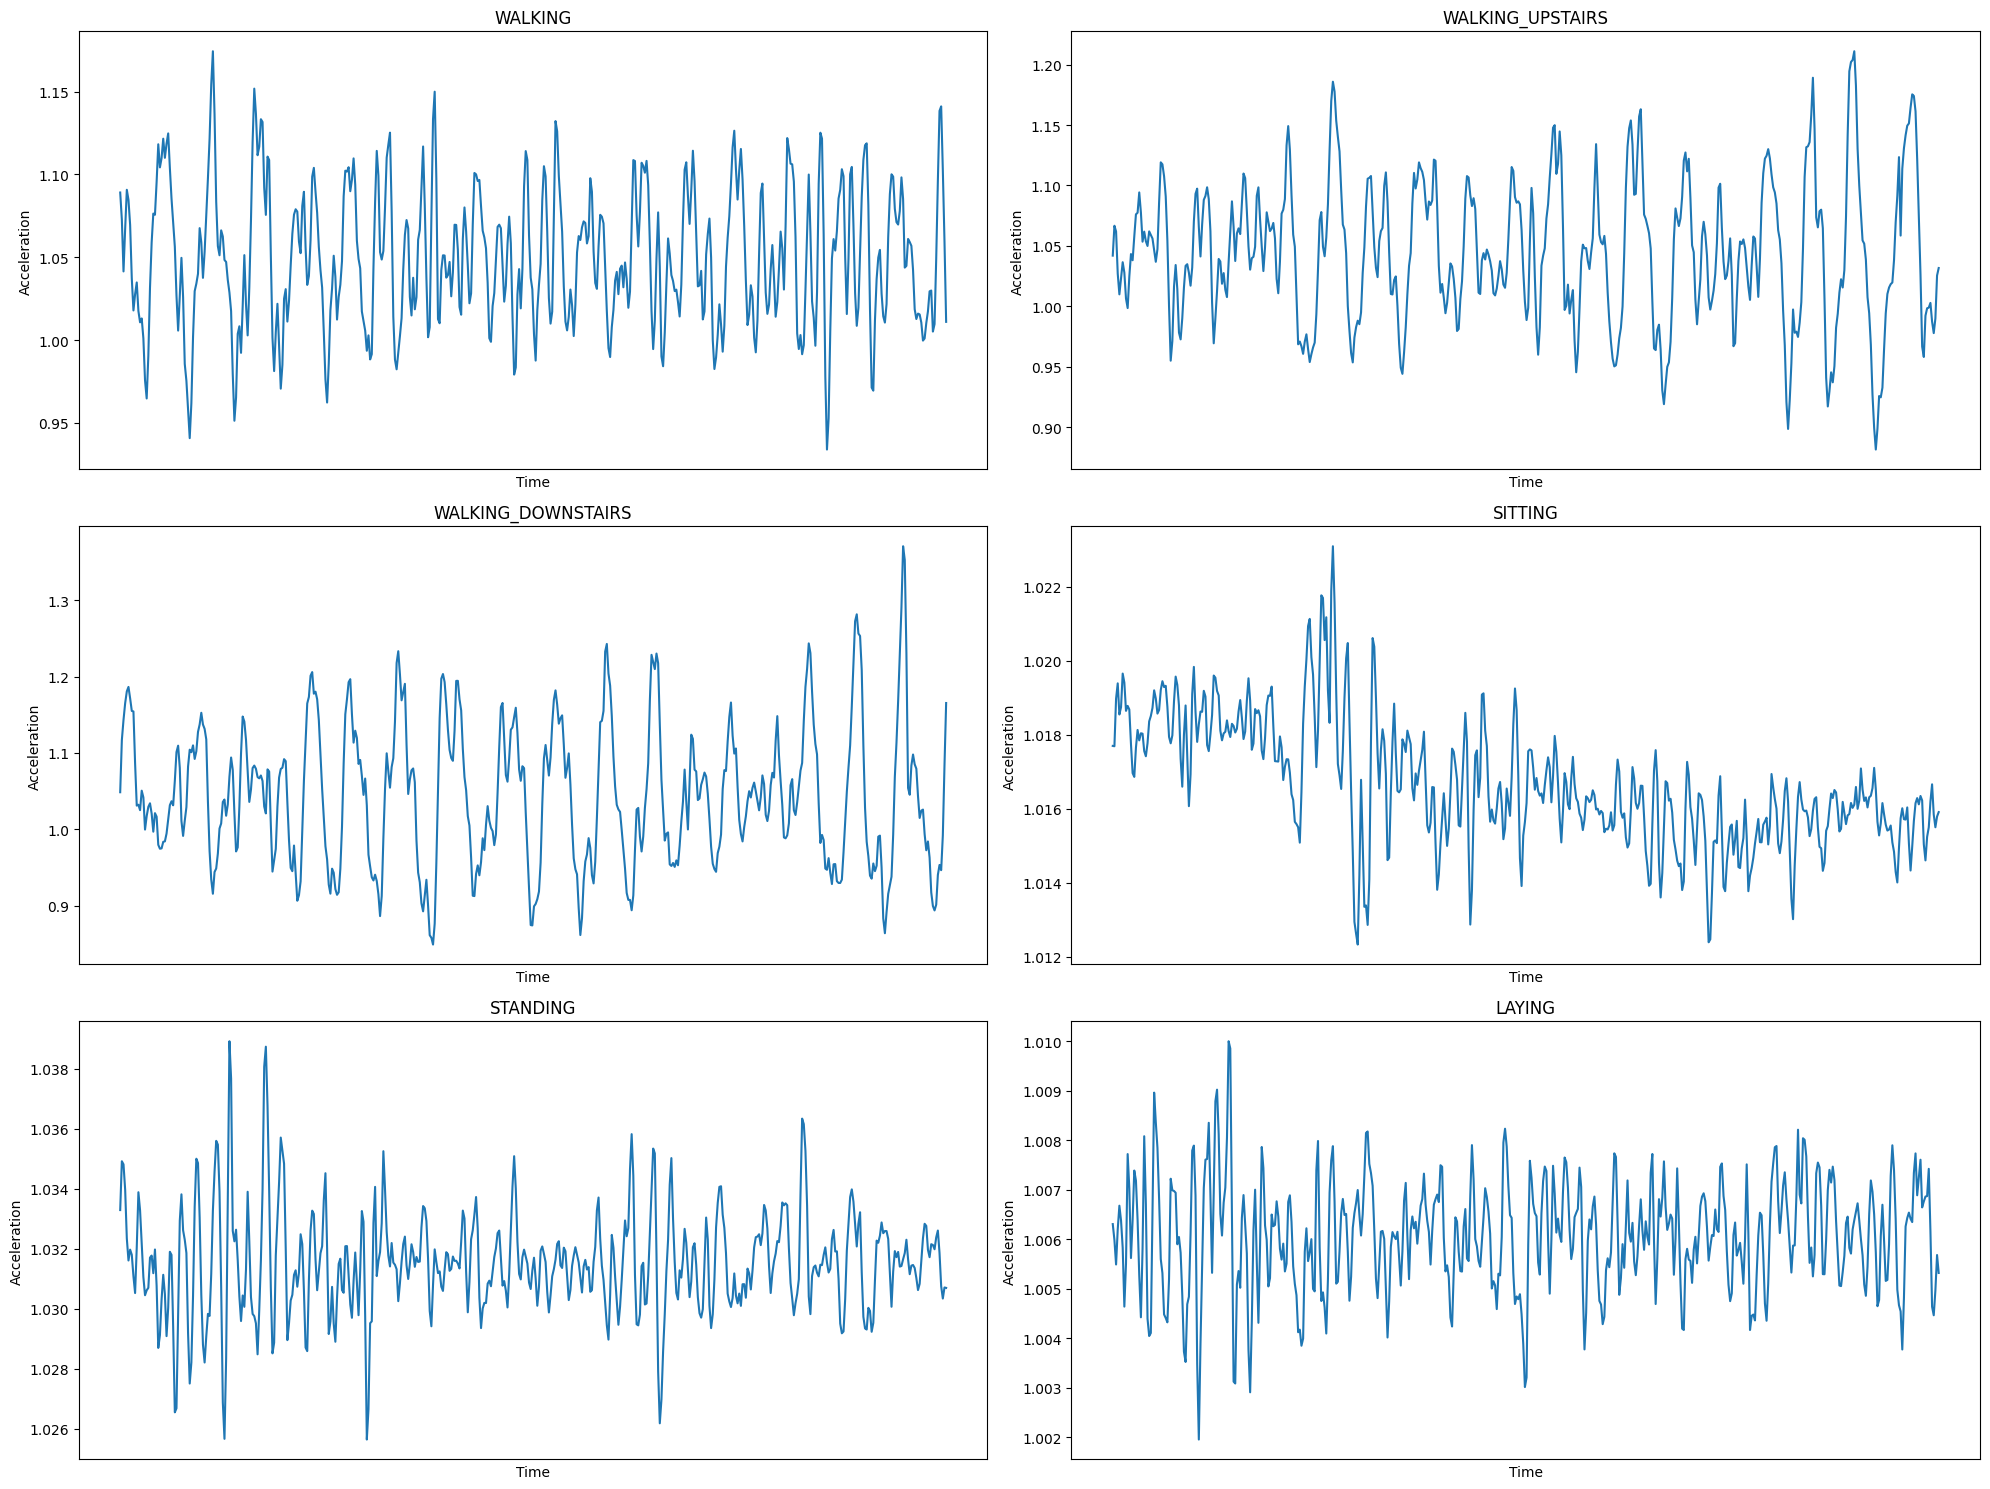

In [21]:
plot_activity_acceleration(X_train, y_train)

The difference between static and dynamic activities is clearly visible in the plots.The linear acceleration for each activity is different. So we don't need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs).

Question3 

3.1


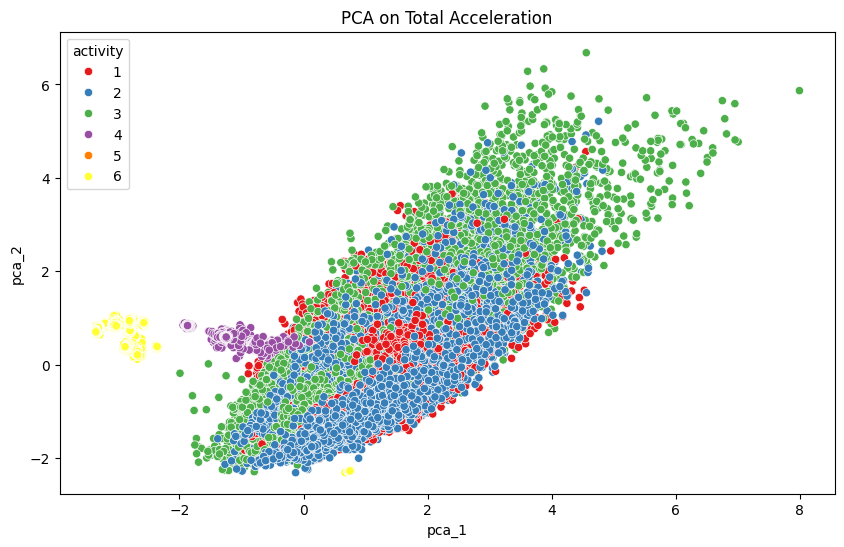

In [103]:
def preprocess_data(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    """
    Preprocesses the data by flattening the input features and adding the labels
    :param X: The input features extracted from MakeDataset.py
    :param y: The labels for the input features extracted from MakeDataset.py
    :return: The preprocessed data
    """
    df = pd.DataFrame(X.reshape(-1, 3), columns=['accx', 'accy', 'accz'])
    df['activity'] = np.repeat(y, 500)
    return df

train_df = preprocess_data(X_train, y_train)
test_df = preprocess_data(X_test, y_test)


train_df.head()

train_df['linear_acceleration'] = np.sum(X_train ** 2, axis=2).reshape(-1)
test_df['linear_acceleration'] = np.sum(X_test ** 2, axis=2).reshape(-1)
val_df['linear_acceleration'] = np.sum(X_val ** 2, axis=2).reshape(-1)


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df.drop('activity', axis=1))
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(train_df_scaled), columns=['pca_1', 'pca_2'])
pca_df['activity'] = train_df['activity']
pca_df.head()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='activity', data=pca_df, palette='Set1')
plt.title('PCA on Total Acceleration')
plt.show()

3.2

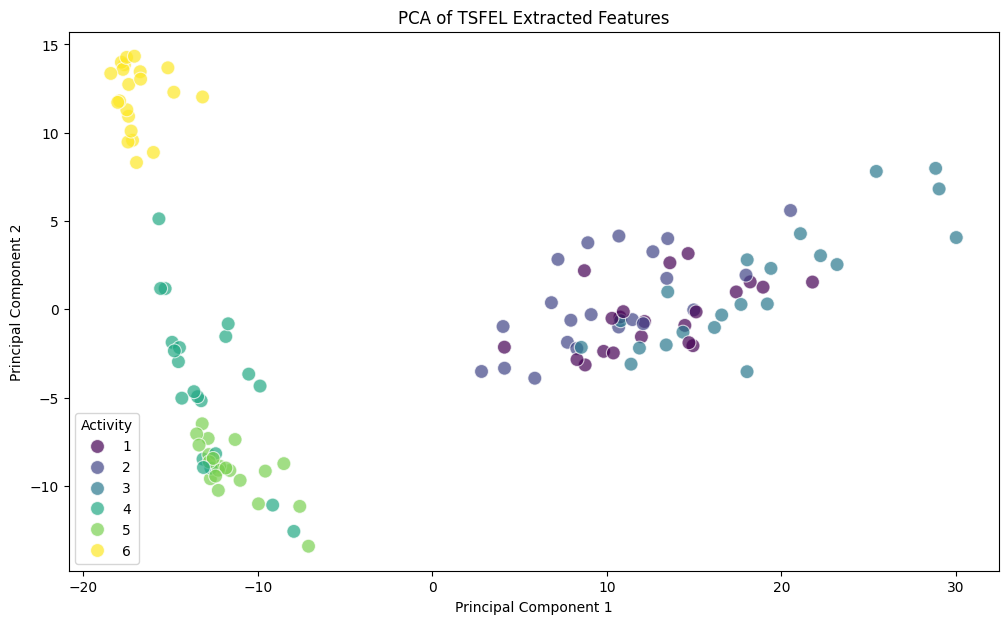

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tsfel
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X_train, X_test, and y_train are already available

def extract_features(X: np.ndarray, y: np.ndarray, fs: int = 50, window_size: int = 500) -> pd.DataFrame:

    cfg = tsfel.get_features_by_domain()
    
    # Prepare data for feature extraction
    num_samples = X.shape[0]
    features_list = []
    labels = []
    
    for i in range(num_samples):
        sample = X[i, :, :]  # Select a single sample
        # Extract features for each axis (x, y, z) with specified sampling frequency and window size
        features = tsfel.time_series_features_extractor(cfg, sample, fs=fs, window_size=window_size)
        features_list.append(features)
        labels.append(y[i])
    
    # Combine all features into a single DataFrame
    features_df = pd.concat(features_list, ignore_index=True)
    features_df['activity'] = np.repeat(labels, features_df.shape[0] // num_samples)
    
    return features_df

# Extract features from data with specific sampling frequency and window size
train_features = extract_features(X_train, y_train, fs=250, window_size=500)

# Prepare data for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_features.drop('activity', axis=1))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['component_1', 'component_2'])
pca_df['activity'] = train_features['activity']

# Plot the PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(x='component_1', y='component_2', hue='activity', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of TSFEL Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()


3.3

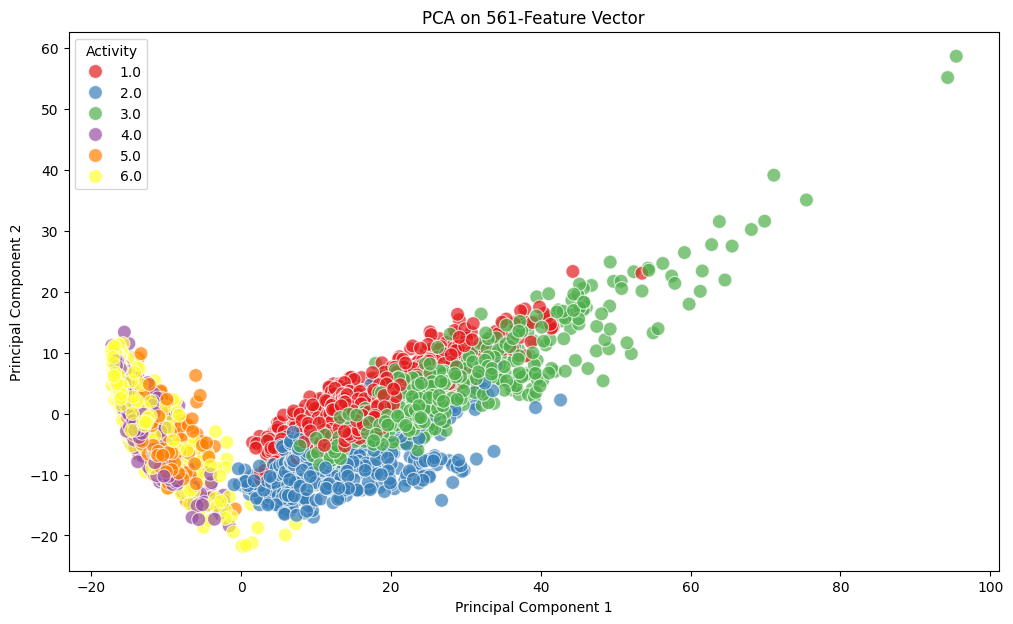

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
# Replace the path with your own file paths if necessary
X_train = np.loadtxt("C:/Users/HP/es335-24-fall-assignment-1/HAR/UCI HAR Dataset/train/X_train.txt")
y_train = np.loadtxt("C:/Users/HP/es335-24-fall-assignment-1/HAR/UCI HAR Dataset/train/y_train.txt")

# If X_train is 3D, reshape it to 2D by flattening the time series dimension
if X_train.ndim == 3:
    n_samples, n_time_steps, n_features = X_train.shape
    X_train = X_train.reshape(n_samples, -1)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standardizing the features

# Step 3: Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Step 4: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['component_1', 'component_2'])
pca_df['activity'] = y_train

# Step 5: Plot the PCA results
plt.figure(figsize=(12, 7))
sns.scatterplot(x='component_1', y='component_2', hue='activity', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA on 561-Feature Vector')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()

3.4:

Overall, TSFEL offers more detailed and insightful visualizations, making it easy for understanding complex  patterns.Total Acceleration is the least effective for visualization in this case, as it oversimplifies the data and difficult to distinguish between different activities. Original Features also found effective, especially if the data is well-prepared and meaningful features are included.

Question 4

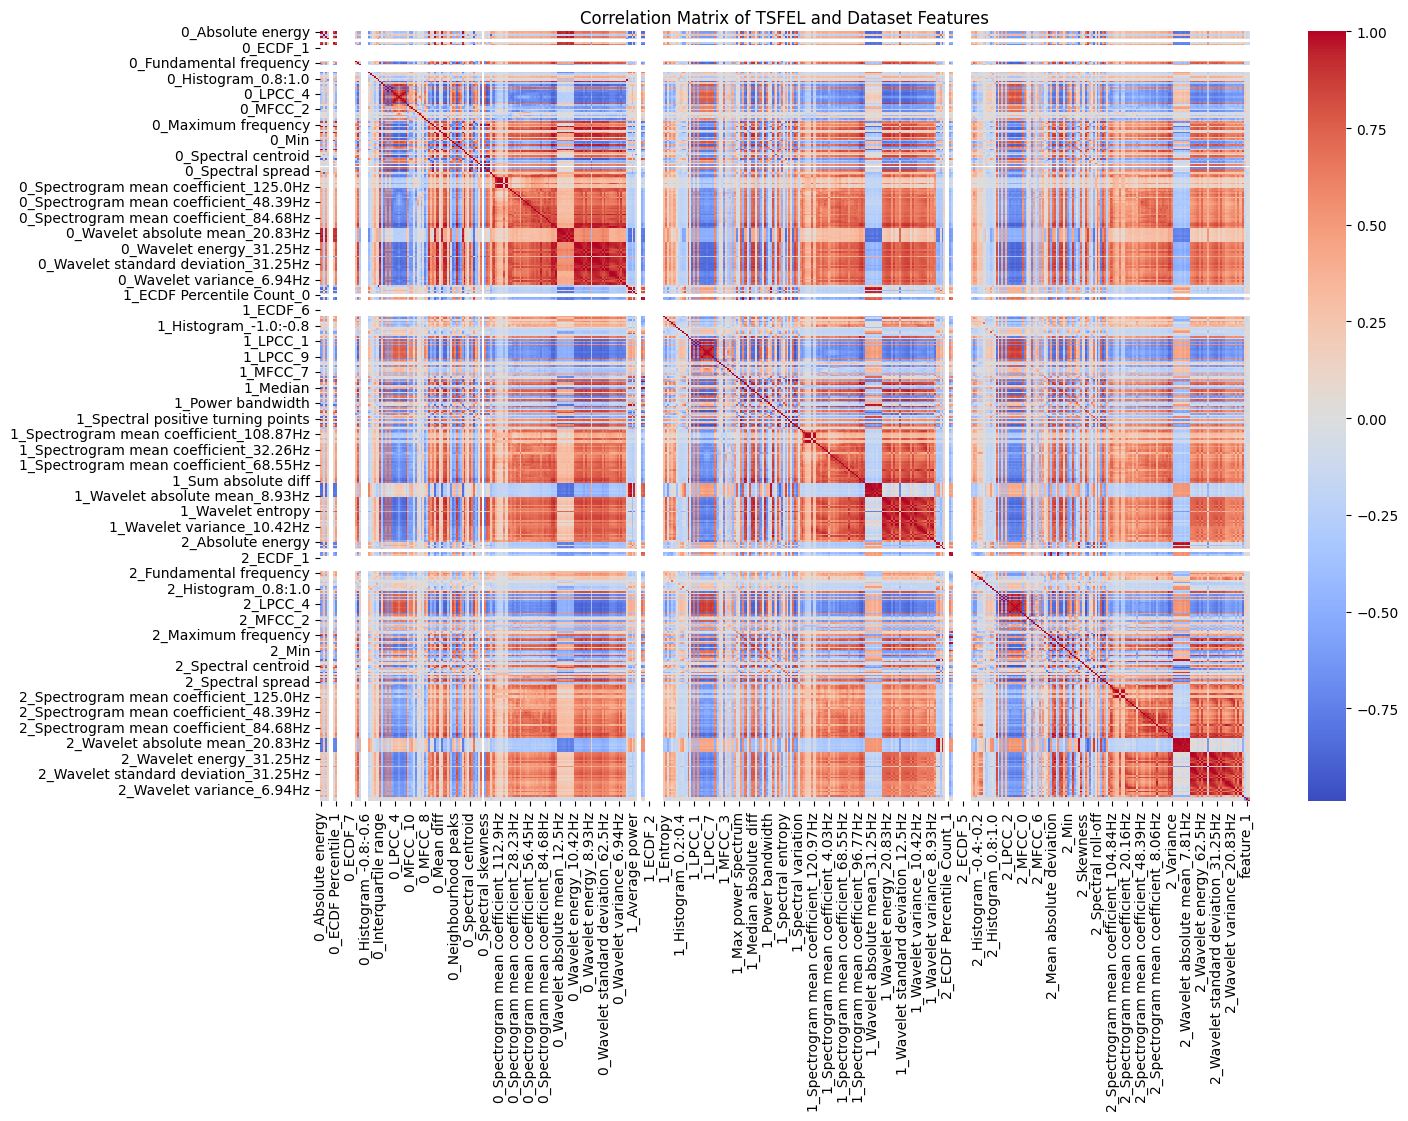

Highly correlated feature pairs (threshold > 0.9 or < -0.9):
Features: ('0_Absolute energy', '0_Area under the curve'), Correlation: 0.9837945583352146
Features: ('0_Absolute energy', '0_Average power'), Correlation: 1.0000000000000002
Features: ('0_Absolute energy', '0_ECDF Percentile_1'), Correlation: 0.972868635553538
Features: ('0_Absolute energy', '0_Mean'), Correlation: 0.9750136235421917
Features: ('0_Absolute energy', '0_Median'), Correlation: 0.9550045337175037
Features: ('0_Absolute energy', '0_Root mean square'), Correlation: 0.989850570112598
Features: ('0_Absolute energy', '0_Wavelet absolute mean_10.42Hz'), Correlation: 0.9531225410796744
Features: ('0_Absolute energy', '0_Wavelet absolute mean_12.5Hz'), Correlation: 0.944065324028366
Features: ('0_Absolute energy', '0_Wavelet absolute mean_15.62Hz'), Correlation: 0.9337826907206535
Features: ('0_Absolute energy', '0_Wavelet absolute mean_20.83Hz'), Correlation: 0.9230814697794302
Features: ('0_Absolute energy', '0_Wavele

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tsfel
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X_train, X_test, and y_train are already available



# Step 1: Extract features using TSFEL
# train_features_tsfel = extract_features(X_train, y_train, fs=250, window_size=500)

# Step 2: Define dataset_features if not already defined
# Example: Flattening X_train to get original features (assuming X_train has shape [samples, timesteps, features])
n_samples, n_timesteps, n_features = X_train.shape
dataset_features = pd.DataFrame(X_train.reshape(n_samples * n_timesteps, n_features), 
                                columns=[f'feature_{i}' for i in range(n_features)])

# Combine TSFEL features with original dataset features
combined_features = pd.concat([train_features.drop('activity', axis=1), dataset_features], axis=1)

# Step 3: Calculate the correlation matrix
correlation_matrix = combined_features.corr()

# Step 4: Visualize the correlation matrix (optional but recommended)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of TSFEL and Dataset Features')
plt.show()

# Step 5: Identify highly correlated features (threshold > 0.9 or < -0.9)
threshold = 0.9
high_corr_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[0]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_pair = (correlation_matrix.index[i], correlation_matrix.columns[j])
            high_corr_pairs.append((feature_pair, correlation_matrix.iloc[i, j]))

# Step 6: Check for redundancy
if high_corr_pairs:
    print("Highly correlated feature pairs (threshold > 0.9 or < -0.9):")
    for pair, corr_value in high_corr_pairs:
        print(f"Features: {pair}, Correlation: {corr_value}")
else:
    print("No highly correlated features found.")
